In [2]:
import os, sys

import torch

import matplotlib.pyplot as plt

In [3]:
sys.path.append('../..')

In [4]:
from lib.datasets import get_train_test_img_ids_split, get_kfolds
from lib.dataloaders import PatchesDataset
from lib.augmentations import augment_v1

In [5]:
train_img_ids, test_img_ids = get_train_test_img_ids_split()

In [6]:
train_img_ids[:4], test_img_ids[:4]

(['eaf66ac783499827a7f09d69793a07d7',
  'ea035a96c752f59a4934a91068b318f2',
  '4c0d7290c72b5495df6c337b1e5dee88',
  '9edf591d741baf346fc1ff0f42dd4ddc'],
 ['e8baa3bb9dcfb9cef5ca599d62bb8046',
  '9b2948ff81b64677a1a152a1532c1a50',
  '5b003d43ec0ce5979062442486f84cf7',
  '375b2c9501320b35ceb638a3274812aa'])

In [8]:
train_loader = torch.utils.data.DataLoader(
    PatchesDataset(train_img_ids, scale=1, transform=None),  # augment_v1
    batch_size=64, shuffle=False, num_workers=0,
)

In [10]:
len(train_loader.dataset)

2061679

In [11]:
%%time
img, mask, labes, provider, isup_grade, g_score = next(iter(train_loader))

CPU times: user 1.5 s, sys: 101 ms, total: 1.6 s
Wall time: 523 ms


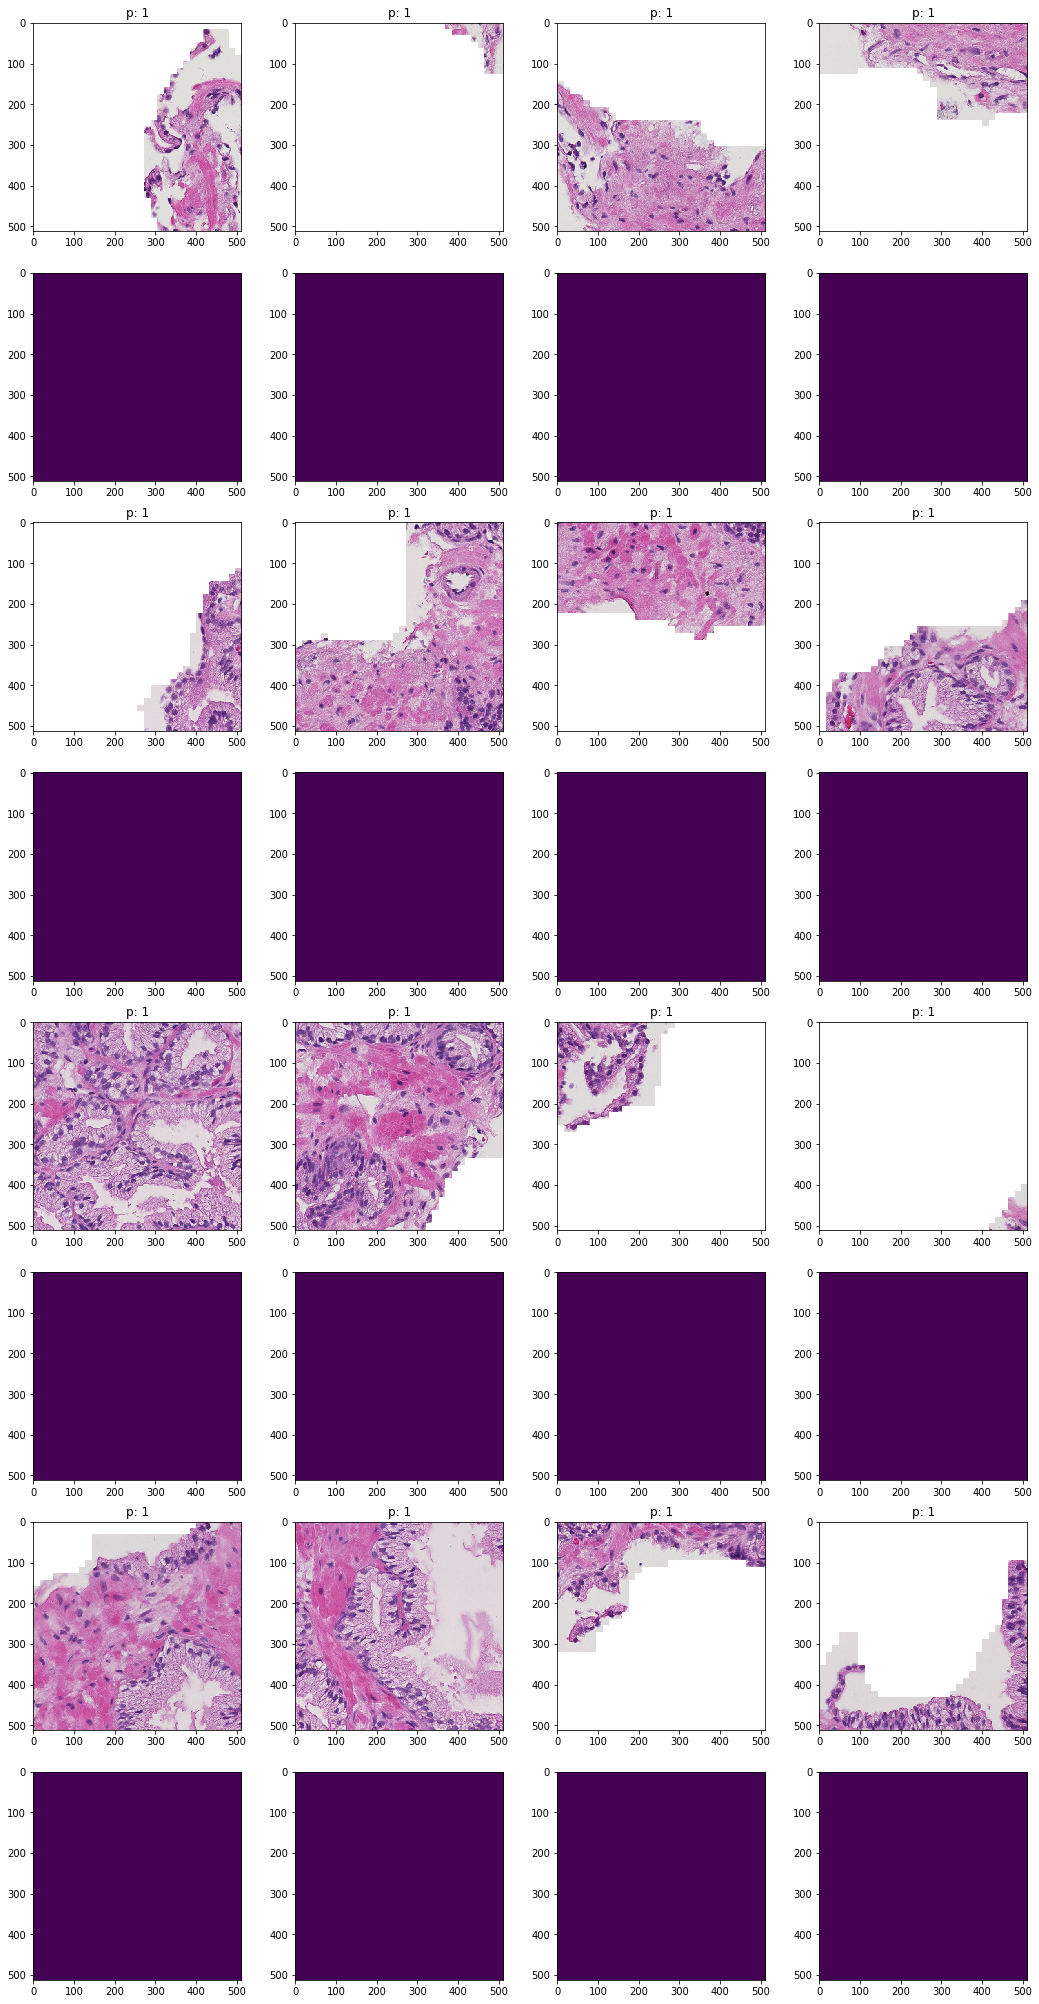

In [12]:
fig, axs = plt.subplots(8, 4, figsize=(18, 36))
i_axs = axs[0::2].ravel()
m_axs = axs[1::2].ravel()

for i in range(4*4):
    i_axs[i].imshow(img[i].transpose(0, -1) / 255);
    m_axs[i].imshow(((mask[i] == 3) | (mask[i] == 4) | (mask[i] == 5) | (mask[i] == 8)).T);
    i_axs[i].set_title(f"p: {provider[i]}");
    # i_axs[i].set_title(f"p: {provider[i]}, " + ", ".join([f"{labes[i, n]:.2f}" for n in range(9)]))

In [13]:
t_img = img[8].transpose(0, -1).type(torch.uint8).cpu()

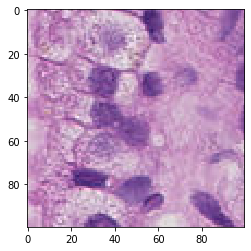

In [14]:
plt.imshow(t_img[:100, :100]);

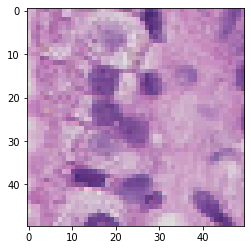

In [25]:
plt.imshow(t_img[:50, :50]);